In [33]:
#import libs
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from mlxtend.plotting import plot_decision_regions

sns.set()

In [2]:
iris = load_iris()
print(iris)
print(iris.keys())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

In [4]:
print(f'Liczba próbek : {len(data)}')
print(f'Kształt danych : {data.shape}')
print(f'Nazwy atrybutów : {feature_names}')
print(f'Nazwy kategorii iris : {class_names}')

Liczba próbek : 150
Kształt danych : (150, 4)
Nazwy atrybutów : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii iris : ['setosa' 'versicolor' 'virginica']


Iris setosa

In [5]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg', width=200)

Iris versicolor

In [6]:
Image(url="https://www.plant-world-seeds.com/images/item_images/000/003/884/large_square/IRIS_VERSICOLOR.JPG?1495391088", width=200)

Iris virginica

In [7]:
Image(url="https://www.fs.fed.us/wildflowers/beauty/iris/Blue_Flag/images/iris_virginica/iris_virginica_virginica_lg.jpg", width=200)

In [8]:
df = pd.DataFrame(np.c_[data, targets], columns=feature_names + ['label'])
print(df)

     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2    0.0
1             4.9          3.0           1.4          0.2    0.0
2             4.7          3.2           1.3          0.2    0.0
3             4.6          3.1           1.5          0.2    0.0
4             5.0          3.6           1.4          0.2    0.0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3    2.0
146           6.3          2.5           5.0          1.9    2.0
147           6.5          3.0           5.2          2.0    2.0
148           6.2          3.4           5.4          2.3    2.0
149           5.9          3.0           5.1          1.8    2.0

[150 rows x 5 columns]


In [9]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

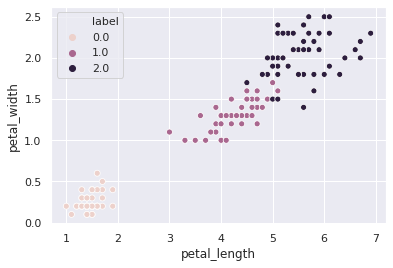

In [12]:
sns.scatterplot('petal_length', 'petal_width', data=df, hue='label', legend='full')

Prepared a model

In [13]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'label']]
y = X.pop('label')
# print(X)
# print(y)

In [14]:
X = X.values
y = y.values.astype('int32')
# print(X)
# print(y)

Buliding decision tree

In [35]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

Text(0.5, 1.0, 'Decision tree - max_depth=2')

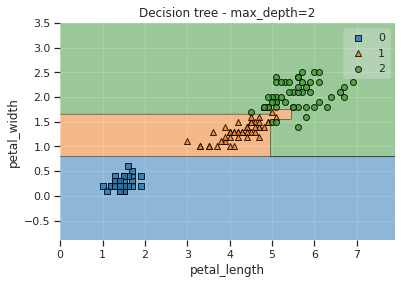

In [24]:
plot_decision_regions(X, y, tree_clf)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Decision tree - max_depth=2')

In [22]:
tree_clf.score(X, y) # accuracy

0.96

In [29]:
export_graphviz(tree_clf, out_file='iris_tree.dot', feature_names=feature_names[2:], class_names=class_names, rounded=True, filled=True)

In [34]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree.png

In [37]:
def make_decision_tree(max_depth=1):
    tree_clf = DecisionTreeClassifier(max_depth=max_depth)
    tree_clf.fit(X, y)
    export_graphviz(tree_clf, out_file='iris_tree.dot',
                    feature_names=feature_names[2:],
                    class_names=class_names,
                    rounded=True, filled=True)
    
    plot_decision_regions(X, y, tree_clf)
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.title(f'Decision tree - max_depth={max_depth}')
    
    print(f'Accuracy : {tree_clf.score(X, y)}')

Accuracy : 0.9733333333333334


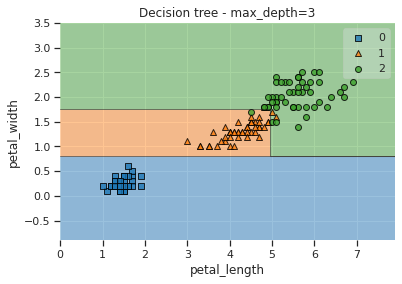

In [39]:
make_decision_tree(3)

In [40]:
    %%bash
    dot -Tpng iris_tree.dot -o iris_tree.png